In [1]:
import tensorflow as tf
import numpy as np

import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython import display

from iaf_dynamics import DVBFNoKL
from world import PendulumFullObs

def sample_batch(X, U, batch_size):
    sample = np.random.rand(batch_size) * X.shape[1]
    sample = sample.astype(int)

    batch_x = X[:, sample]
    batch_u = U[:, sample]
    
    return batch_x, batch_u

In [2]:
# Get the dataset
world = PendulumFullObs()
X, U, R, S = world.get_data_set(episodes=500, steps=50)

[2017-09-03 12:15:09,644] Making new env: Pendulum-v0


In [3]:
# Define the model
n_obs = 3
n_control = 1
n_latent =  4
n_enc = 10
learning_rate = 0.001
min_learning_rate = 0.0001
decay_rate = 0.999
m = DVBFNoKL(n_obs, n_control, n_latent, n_enc, learning_rate)

('total loss at epoch: ', 0, ' : ', 18.092060089111328)
('kl -  analytical: ', array([[  4.67662096,   3.1135242 ,   5.67250109, ...,   6.12664795,
          5.39267111,  10.59312725],
       [  2.94194484,   3.3842175 ,   3.43067908, ...,   3.42255521,
          4.21797514,   2.26161551],
       [  2.6478827 ,   2.01643276,   2.89992404, ...,   1.6129632 ,
          4.37455797,   2.71050358],
       ..., 
       [  3.22778893,   2.44496918,   2.00896406, ...,   2.42980981,
          2.34189963,   2.87780452],
       [  3.04147983,   2.75716496,   1.79691589, ...,   2.316962  ,
          2.63403821,   1.62659013],
       [  4.34531307,   2.969733  ,   2.82802558, ...,   1.98281944,
          2.35067105,   3.07403588]], dtype=float32), ' , monte carlo: ', array([[-5.06833601, -2.27498794, -5.45659685, ..., -5.30309534,
        -3.40172458, -5.96515083],
       [-1.39139044, -3.18692017, -2.09764194, ..., -3.42780185,
        -4.63771057, -1.90324271],
       [-1.89281404, -1.88197994, -

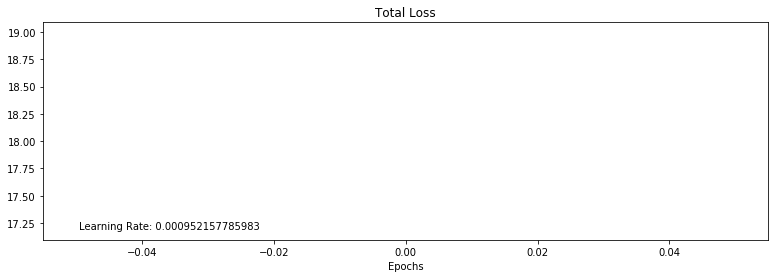

('total loss at epoch: ', 10, ' : ', 11.480709075927734)
('kl -  analytical: ', array([[  5.29606199,   4.47899008,   6.69477224, ...,   2.43171978,
          1.71001661,  10.71379852],
       [  2.69451833,   2.43418479,   2.03994036, ...,   1.13690579,
          1.96741641,   3.37963271],
       [  2.2067101 ,   2.1355536 ,   2.33204389, ...,   1.37115097,
          2.10951567,   2.9335022 ],
       ..., 
       [  2.10417271,   1.97295094,   2.33263612, ...,   1.92379034,
          2.15089583,   1.58251238],
       [  2.02774072,   3.14329314,   1.8915838 , ...,   2.14638638,
          2.62506032,   1.74503422],
       [  1.84338343,   1.48252666,   1.58874953, ...,   1.76018298,
          2.04929328,   2.12700248]], dtype=float32), ' , monte carlo: ', array([[-6.61200094, -4.58513784, -7.29983377, ..., -1.64332294,
        -1.89751947, -7.90257215],
       [-3.11096382, -2.29540992, -3.32864499, ..., -1.72959423,
        -1.44038165, -3.15629888],
       [-1.7219944 , -2.0338366 , 

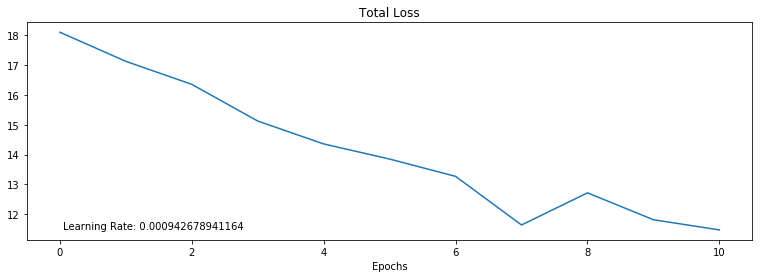

('total loss at epoch: ', 20, ' : ', 8.1889451344807949)
('kl -  analytical: ', array([[  3.97831035,  11.73099899,  10.05149364, ...,   6.40172386,
         14.52558136,   8.57040501],
       [  1.65695322,   2.27189612,   1.40405977, ...,   1.00713098,
          2.35042071,   1.75295675],
       [  1.73253596,   1.55636835,   1.36479533, ...,   0.82364005,
          1.39302886,   1.41255987],
       ..., 
       [  1.73325861,   1.02894092,   2.98741531, ...,   1.08558035,
          2.03617859,   1.52711546],
       [  1.35293293,   1.06658602,   1.22422826, ...,   1.4753294 ,
          1.30778801,   1.86208534],
       [  1.88256133,   1.21235001,   2.69844413, ...,   1.01179564,
          1.01003265,   1.3106457 ]], dtype=float32), ' , monte carlo: ', array([[ -3.07281208, -13.82605743,  -8.64683819, ...,  -6.74708128,
        -14.69519806, -11.70981693],
       [ -1.58633709,  -2.38915658,  -1.31088591, ...,  -0.27349004,
         -3.3065567 ,  -2.52261186],
       [ -1.8618021 , 

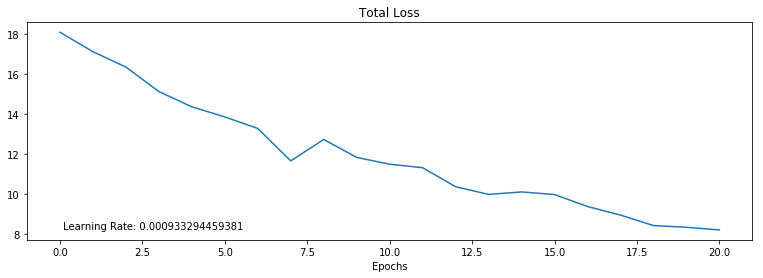

('total loss at epoch: ', 30, ' : ', 5.9489520390828448)
('kl -  analytical: ', array([[  8.08279419,   1.77580011,   9.4387455 , ...,  11.28396511,
          3.84965706,   6.57255411],
       [  2.04327941,   0.99296397,   1.29718888, ...,   0.71566266,
          1.32682204,   1.67886066],
       [  1.78324354,   0.78140229,   1.65093565, ...,   0.91266298,
          1.12661231,   1.51182938],
       ..., 
       [  1.03728497,   1.1392808 ,   1.54938936, ...,   1.48686469,
          1.28976631,   1.69055891],
       [  1.31434107,   1.46876848,   1.21976221, ...,   1.20620763,
          1.60386288,   0.96362734],
       [  1.33626735,   1.07094562,   1.31236243, ...,   2.0915215 ,
          1.90797615,   1.31175935]], dtype=float32), ' , monte carlo: ', array([[ -6.98298836,  -1.44233286,  -7.16958618, ..., -17.98403931,
         -3.9596746 ,  -5.95161247],
       [ -1.88868284,  -1.88648891,  -2.35881209, ...,  -0.92681551,
         -1.63211763,  -2.19720054],
       [ -2.49302864, 

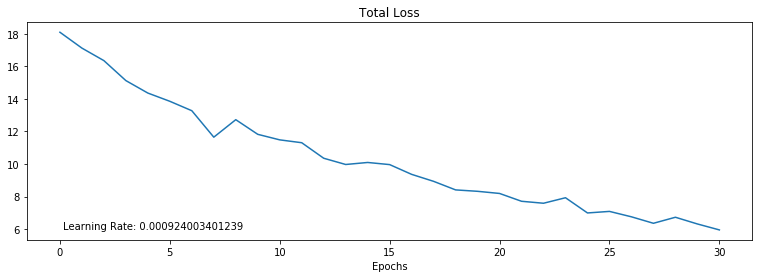

('total loss at epoch: ', 40, ' : ', 4.965471426645915)
('kl -  analytical: ', array([[ 1.3467263 ,  9.03563023,  4.9129405 , ...,  7.18447638,
         4.81020832,  4.50968504],
       [ 0.99321133,  1.46309578,  1.15976548, ...,  1.22371531,
         1.25501502,  1.05347681],
       [ 0.53734308,  0.66758031,  0.73342711, ...,  1.33834636,
         0.92182714,  0.75664765],
       ..., 
       [ 1.5991236 ,  0.75488931,  0.77294636, ...,  1.14915657,
         0.89646435,  1.51516521],
       [ 1.1068424 ,  0.76355261,  0.77100545, ...,  0.77823544,
         1.1593014 ,  1.24529207],
       [ 0.85838443,  0.97696084,  0.55028254, ...,  0.67058283,
         1.03944695,  1.2241261 ]], dtype=float32), ' , monte carlo: ', array([[ -1.37413549, -14.63579559,  -4.78470182, ...,  -6.85880899,
         -5.1983552 ,  -4.99580717],
       [ -1.58984339,  -2.04890466,  -1.14804316, ...,   0.09929538,
         -1.51339102,  -0.76427287],
       [ -1.0297991 ,  -1.22757924,  -0.85040337, ...,  -2.

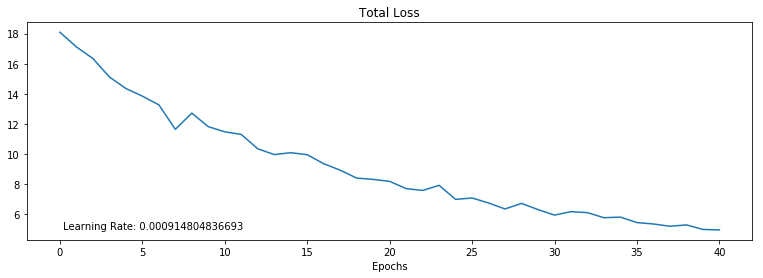

In [5]:
# Training parameters
training_epochs = 350
batch_size = 128
steps_per_epoch = X.shape[1] / batch_size
display_step = 10

epochs = []
total_loss = []
kl = []
mc_est = []

# Training cycle
for epoch in range(training_epochs):
    
    # Decay the learning rate
    if learning_rate > min_learning_rate:
        learning_rate *= decay_rate

    # Train one epoch 
    avg_total_loss = .0
    avg_kl = .0
    avg_mc_est = .0
    for i in range(steps_per_epoch):
        batch_x, batch_u = sample_batch(X, U, batch_size)
        temp_total_loss, temp_kl, temp_mc_est = m.train(batch_x, batch_u, learning_rate)
        #print("kl -  analytical: ", kl, " , monte carlo: ", mc_est)
        avg_total_loss += temp_total_loss
        avg_kl += temp_kl
        avg_mc_est += temp_mc_est
    
    avg_total_loss /= steps_per_epoch
    avg_kl /= steps_per_epoch
    avg_mc_est /= steps_per_epoch
    
    total_loss.append(avg_total_loss)
    kl.append(avg_kl)
    mc_est.append(avg_mc_est)
    epochs.append(epoch)

    # Plot the results
    if epoch % display_step == 0:
                
        plt.close()
        f, axarr = plt.subplots(1, 1, figsize=(13, 4))
        axarr.plot(epochs, total_loss)
        axarr.set_xlabel('Epochs')
        axarr.set_title('Total Loss')
        axarr.annotate("Learning Rate: " + str(learning_rate), xy=(0.05, 0.05), xycoords='axes fraction')

        print ('total loss at epoch: ', epoch, ' : ',total_loss[-1])
        print("kl -  analytical: ", kl[-1], " , monte carlo: ", mc_est[-1])
        #axarr.set_ylim(-14.0, 10)

        display.display(plt.gcf())
        display.clear_output(wait=True)

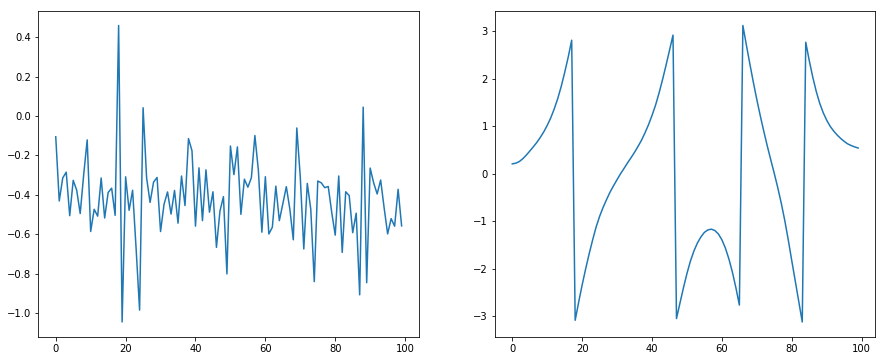

In [19]:
# Get the true trajectory
X_temp, U_temp, R_temp, S_temp = world.get_data_set(episodes=100)
x_obs = m.sess.run((m.gen_x_mean), feed_dict={m.x: X_temp, m.u:U_temp})

# Plot the position and reward of low dim pendulum
e = int(np.random.rand() * 100)
f, axarr = plt.subplots(1, 2, figsize=(15, 6))
axarr[0].plot(np.arctan2(x_obs[:, e, 1], x_obs[:, e, 0]))
axarr[1].plot(np.arctan2(X_temp[:, e, 1], X_temp[:, e, 0]))
plt.show()